## 单变量函数优化 (minimize_scalar, brent)

### `minimize_scalar`使用brent方法进行优化
brent 方法结合了黄金分割法、二分法和插值法的优点，是一种高效的优化方法。

In [1]:
import numpy as np
from scipy.optimize import minimize_scalar

# 定义目标函数
def objective(x):
    return x**2 + 10*np.sin(x)

# 使用 minimize_scalar 进行优化
result = minimize_scalar(objective)# 默认使用brent方法

print("最优解 x:", result.x)
print("最小值:", result.fun)


最优解 x: -1.3064400120612139
最小值: -7.945823375615284


### `minimize_scalar`使用golden方法进行优化
golden 方法是经典的黄金分割法，用于无约束的单变量最小化问题。黄金分割法是一种通过分割区间来逐步逼近最优解的方法。

In [2]:
from scipy.optimize import minimize_scalar

# 使用 golden 方法进行优化
result = minimize_scalar(objective, method='golden')

print("最优解 x:", result.x)
print("最小值:", result.fun)


最优解 x: -1.3064400130372908
最小值: -7.9458233756152845


### `minimize_scalar`使用bounded方法进行优化
bounded 方法用于在给定的区间内进行最优化。它可以用于约束优化问题，限制了搜索的区间。

In [3]:
from scipy.optimize import minimize_scalar

# 使用 bounded 方法进行优化（指定区间）
result = minimize_scalar(objective, method='bounded', bounds=(-5, 5), options={'disp': True})

print("最优解 x:", result.x)
print("最小值:", result.fun)



Optimization terminated successfully;
The returned value satisfies the termination criteria
(using xtol =  1e-05 )
最优解 x: -1.3064399324551186
最小值: -7.94582337561525


## 总结
1. minimize_scalar：默认使用 Brent 方法，支持 brent、golden 和 bounded 等多种算法。
2. golden：经典的黄金分割法，逐步缩小搜索区间，适合单变量优化。
3. brent：结合了黄金分割法、二分法和插值法，通常能更快速地收敛。
4. bounded：带有区间限制的优化方法，用于有界的单变量优化。

## 多变量函数优化

### Nelder-Mead方法
Nelder-Mead 是一种常用的启发式算法，也称作单纯形法，广泛用于没有梯度信息的优化问题。它不需要计算目标函数的导数，适用于无约束的多变量问题。

In [4]:
from scipy.optimize import minimize

# 定义多变量目标函数
def objective(x):
    return x[0]**2 + x[1]**2 + 10 * np.sin(x[0]) + 10 * np.cos(x[1])

# 初始猜测
x0 = [1, 1]

# 使用 Nelder-Mead 进行优化
result = minimize(objective, x0, method='Nelder-Mead')

print("最优解 x:", result.x)
print("最小值:", result.fun)


最优解 x: [-1.30647127  2.59573973]
最小值: -9.754806711738814


## BFGS 方法
BFGS（Broyden-Fletcher-Goldfarb-Shanno）方法是一种准牛顿法，适用于具有连续一阶导数的目标函数。它通过估算目标函数的二阶导数来加速优化过程。

In [5]:
from scipy.optimize import minimize

# 定义多变量目标函数及其梯度
def objective(x):
    return x[0]**2 + x[1]**2 + 10 * np.sin(x[0]) + 10 * np.cos(x[1])

def gradient(x):
    return np.array([2*x[0] + 10*np.cos(x[0]), 2*x[1] - 10*np.sin(x[1])])

# 初始猜测
x0 = [1, 1]

# 使用 BFGS 进行优化
result = minimize(objective, x0, jac=gradient, method='BFGS')

print("最优解 x:", result.x)
print("最小值:", result.fun)


最优解 x: [-1.30643994  2.59573906]
最小值: -9.754806717436724


## L-BFGS-B 方法
L-BFGS-B 是 BFGS 方法的一个变种，适用于有约束的优化问题。它可以处理简单的边界约束，通常用于大规模问题。

In [6]:
from scipy.optimize import minimize

# 定义多变量目标函数
def objective(x):
    return x[0]**2 + x[1]**2 + 10 * np.sin(x[0]) + 10 * np.cos(x[1])

# 初始猜测
x0 = [1, 1]

# 使用 L-BFGS-B 进行优化（边界约束）
bounds = [(-5, 5), (-5, 5)]  # 定义边界

result = minimize(objective, x0, method='L-BFGS-B', bounds=bounds)

print("最优解 x:", result.x)
print("最小值:", result.fun)


最优解 x: [-1.30644001  2.59573906]
最小值: -9.754806717436747


## Powell 方法
Powell 方法是一种无约束优化算法，结合了梯度和函数值。它不需要目标函数的梯度信息，可以用于多变量无约束优化问题。

In [7]:
from scipy.optimize import minimize

# 定义多变量目标函数
def objective(x):
    return x[0]**2 + x[1]**2 + 10 * np.sin(x[0]) + 10 * np.cos(x[1])

# 初始猜测
x0 = [1, 1]

# 使用 Powell 方法进行优化
result = minimize(objective, x0, method='Powell')

print("最优解 x:", result.x)
print("最小值:", result.fun)


最优解 x: [-1.30645358  2.59572836]
最小值: -9.75480671575818


## Trust-Region 方法
Trust-Region 方法是一种基于局部近似的优化方法，常用于处理大规模和高维问题。

In [8]:
from scipy.optimize import minimize

# 定义多变量目标函数
def objective(x):
    return x[0]**2 + x[1]**2 + 10 * np.sin(x[0]) + 10 * np.cos(x[1])

# 初始猜测
x0 = [1, 1]

# 使用 trust-constr 方法进行优化
result = minimize(objective, x0, method='trust-constr')

print("最优解 x:", result.x)
print("最小值:", result.fun)


最优解 x: [-1.30643999  2.59573906]
最小值: -9.754806717436747


## Conjugate Gradient 方法
共轭梯度法适用于二次函数优化，或在目标函数具有高维数的情况下，通过梯度信息来优化。

In [9]:
from scipy.optimize import minimize

# 定义多变量目标函数
def objective(x):
    return x[0]**2 + x[1]**2 + 10 * np.sin(x[0]) + 10 * np.cos(x[1])

# 初始猜测
x0 = [1, 1]

# 使用 Conjugate Gradient 进行优化
result = minimize(objective, x0, method='CG')

print("最优解 x:", result.x)
print("最小值:", result.fun)


最优解 x: [-1.30643981  2.59573933]
最小值: -9.754806717436182


## TNC (Truncated Newton Conjugate-Gradient)
1. 方法描述：结合牛顿法和共轭梯度法的优化方法，适用于大规模问题。
2. 适用场景：大规模优化问题，且支持边界约束。

In [11]:
from scipy.optimize import minimize

# 定义多变量目标函数
def objective(x):
    return x[0]**2 + x[1]**2 + 10 * np.sin(x[0]) + 10 * np.cos(x[1])

# Initial guess
x0 = [1, 1]

# Minimize using TNC
bounds = [(-1, 1), (-1, 1)]
result = minimize(objective, x0, method='TNC', bounds=bounds)
print(result)


 message: Local minimum reached (|pg| ~= 0)
 success: True
  status: 0
     fun: -1.0116867893975678
       x: [-1.000e+00  1.000e+00]
     nit: 2
     jac: [ 3.403e+00 -6.415e+00]
    nfev: 12


## COBYLA (Constrained Optimization BY Linear Approximations)
1. 方法描述：无梯度的约束优化方法，适用于非光滑目标函数。
2. 适用场景：无梯度的非线性约束优化问题。

In [12]:
from scipy.optimize import minimize

# Objective function
def objective(x):
    return x[0]**2 + x[1]**2

# Constraints
cons = ({'type': 'ineq', 'fun': lambda x: x[0] + x[1] - 1})

# Initial guess
x0 = [0.5, 0.5]

# Minimize using COBYLA with constraints
result = minimize(objective, x0, method='COBYLA', constraints=cons)
print(result)


 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: 0.5000000032978058
       x: [ 5.000e-01  5.000e-01]
    nfev: 36
   maxcv: -0.0


## Dogleg
1. 方法描述：结合牛顿法和拟牛顿法的优化算法，适用于无约束问题。
2. 适用场景：中等规模的无约束优化问题。

在使用 `dogleg` 方法时需要提供目标函数的 **Jacobian（梯度）**，即目标函数的导数信息。`dogleg` 算法是一种信赖域算法，使用牛顿方法的变种，因此需要梯度和海森矩阵（或者是梯度和海森矩阵的近似值）来优化目标函数。

为了使用 `dogleg` 方法，你需要提供梯度（Jacobian）和海森矩阵（Hessian）。这是解决该问题的步骤。
  

In [15]:
from scipy.optimize import minimize

# Objective function
def objective(x):
    return x[0]**2 + x[1]**2

# Gradient (Jacobian)
def jacobian(x):
    return [2*x[0], 2*x[1]]

# Hessian matrix
def hessian(x):
    return [[2, 0], [0, 2]]

# Initial guess
x0 = [1, 1]

# Minimize using Dogleg with jacobian and hessian
result = minimize(objective, x0, method='dogleg', jac=jacobian, hess=hessian)
print(result)


 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 6.162975822039155e-33
       x: [ 5.551e-17  5.551e-17]
     nit: 2
     jac: [ 1.110e-16  1.110e-16]
    nfev: 3
    njev: 3
    nhev: 2
    hess: [[2 0]
           [0 2]]


#### 解释：
- **目标函数**：`objective(x)`，即我们要优化的函数。
- **Jacobian**：`jacobian(x)`，是目标函数的梯度，即每个变量的偏导数。这里我们使用 `2*x[0]` 和 `2*x[1]`，因为目标函数是 \( f(x) = x_0^2 + x_1^2 \)。
- **Hessian**：`hessian(x)`，是目标函数的二阶导数矩阵（海森矩阵）。对于 \( f(x) = x_0^2 + x_1^2 \)，海森矩阵是常数矩阵 \(\begin{bmatrix} 2 & 0 \\ 0 & 2 \end{bmatrix}\)。

## SLSQP (Sequential Least Squares Quadratic Programming)
1. 方法描述：适用于带约束的优化问题，支持等式和不等式约束。
2. 适用场景：带约束的平滑优化问题。

In [14]:
from scipy.optimize import minimize

# Objective function
def objective(x):
    return x[0]**2 + x[1]**2

# Constraints
cons = ({'type': 'eq', 'fun': lambda x: x[0] + x[1] - 1})

# Initial guess
x0 = [0.5, 0.5]

# Minimize using SLSQP with equality constraint
result = minimize(objective, x0, method='SLSQP', constraints=cons)
print(result)


 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.5
       x: [ 5.000e-01  5.000e-01]
     nit: 1
     jac: [ 1.000e+00  1.000e+00]
    nfev: 3
    njev: 1


## 总结

| **方法**         | **适用场景**                            | **优点**                          | **缺点**                          | **约束处理** |
|------------------|----------------------------------------|-----------------------------------|-----------------------------------|--------------|
| **Nelder-Mead**   | 无梯度优化，无约束问题                  | 简单，不需要梯度信息              | 可能收敛慢，不适合高维问题        | 不支持       |
| **BFGS**          | 连续可微函数，适用于中等规模问题        | 收敛较快，适用于大部分连续问题    | 对初值敏感，计算复杂               | 不支持       |
| **L-BFGS-B**      | 大规模优化，带边界约束                 | 适合大规模问题，有边界约束支持    | 对目标函数的平滑性要求较高        | 支持边界约束 |
| **TNC**           | 大规模优化，带边界约束                 | 内存占用较少，适用于大规模问题    | 对不平滑函数敏感                  | 支持边界约束 |
| **Dogleg**        | 需要二阶导数信息的优化问题             | 能利用梯度和海森矩阵信息          | 需要计算梯度和海森矩阵，计算复杂   | 不支持       |
| **Trust-NCG**     | 适用于计算密集型问题，带约束优化        | 结合共轭梯度法和信赖域方法，适合大规模问题 | 收敛速度较慢，可能不适用于某些问题 | 支持约束     |
| **COBYLA**        | 无梯度，适用于带约束的优化问题         | 无需计算梯度，适用于中小规模问题  | 收敛较慢，性能受限于问题规模      | 支持一般约束 |
| **SLSQP**         | 适用于带线性或非线性约束的优化问题     | 支持线性和非线性约束，精度较高    | 对目标函数的平滑性要求较高        | 支持线性/非线性约束 |


---

## 非线性方程组求解

1. fsolve: 用于求解非线性方程组，基于牛顿法或其他求解算法。
2. root: 提供多种算法来求解非线性方程组，包括 hybr（混合牛顿法）、lm（Levenberg-Marquardt）、broyden1（Broyden方法）等。

### 使用 fsolve 求解非线性方程组

In [16]:
import numpy as np
from scipy.optimize import fsolve

# 定义方程组
def equations(vars):
    x, y = vars
    eq1 = x**2 + y**2 - 1  # x^2 + y^2 = 1
    eq2 = x - y             # x = y
    return [eq1, eq2]

# 初始猜测值
initial_guess = [1, 1]

# 使用 fsolve 求解
solution = fsolve(equations, initial_guess)
print("Solution using fsolve:", solution)


Solution using fsolve: [0.70710678 0.70710678]


### 使用 root 求解非线性方程组

In [17]:
from scipy.optimize import root

# 使用相同的方程组
def equations(vars):
    x, y = vars
    eq1 = x**2 + y**2 - 1  # x^2 + y^2 = 1
    eq2 = x - y             # x = y
    return [eq1, eq2]

# 初始猜测值
initial_guess = [1, 1]

# 使用 root 函数，方法可以选择 'hybr', 'lm', 'broyden1' 等
solution = root(equations, initial_guess, method='hybr')
print("Solution using root (hybr):", solution.x)


Solution using root (hybr): [0.70710678 0.70710678]


#### fsolve 与 root 的区别
1. fsolve: 专注于通过求解非线性方程获得解，通常适用于单一方程或较简单的方程组。
2. root: 提供了更多的算法选项，适合需要更精确控制优化过程和算法选择的情况。

---
## 曲线拟合
1. 示例：使用 curve_fit 进行曲线拟合
假设我们有一组数据，并且我们要使用指数函数来拟合这组数据。

2. 步骤：
定义一个拟合函数。
使用 curve_fit 进行拟合。
可视化拟合结果。

Fitted parameters: a = 4.999, b = 0.299


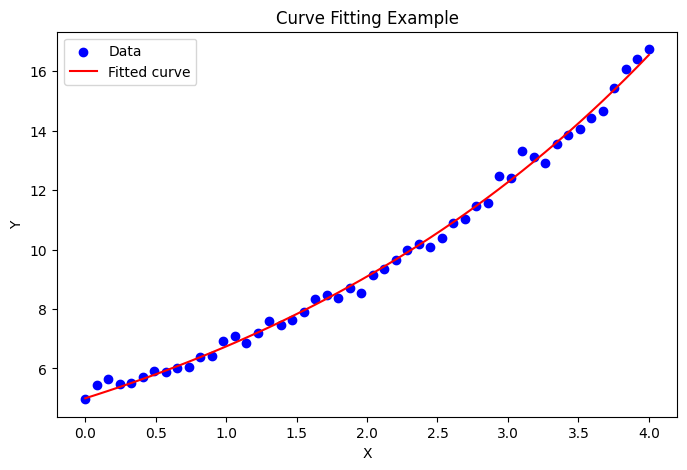

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# 生成模拟数据（假设真实数据遵循指数模型）
def true_model(x):
    return 5 * np.exp(0.3 * x) + np.random.normal(0, 0.2, size=len(x))

# 创建数据点（x值和y值）
x_data = np.linspace(0, 4, 50)
y_data = true_model(x_data)

# 定义拟合模型函数（指数函数形式）
def model(x, a, b):
    return a * np.exp(b * x)

# 使用 curve_fit 进行拟合，返回拟合参数（a, b）
params, covariance = curve_fit(model, x_data, y_data, p0=[1, 0.1])

# 打印拟合参数
print(f"Fitted parameters: a = {params[0]:.3f}, b = {params[1]:.3f}")

# 使用拟合参数进行预测
y_fit = model(x_data, *params)

# 可视化拟合结果
plt.figure(figsize=(8, 5))
plt.scatter(x_data, y_data, label="Data", color='blue')
plt.plot(x_data, y_fit, label="Fitted curve", color='red')
plt.title("Curve Fitting Example")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()


### 解释：
1. **`true_model`**：生成带有噪声的模拟数据，数据点遵循一个指数函数。
2. **`model`**：拟合的函数形式，这里假设我们用指数函数进行拟合，`a` 和 `b` 是我们需要确定的拟合参数。
3. **`curve_fit`**：该函数通过最小化误差平方和（最小二乘法）来拟合模型，它返回拟合参数和协方差矩阵。
4. **可视化**：通过 `matplotlib` 可视化原始数据和拟合后的曲线。


## 全局优化
全局优化是指在整个搜索空间中找到最优解，而不是局部最优解。在 scipy.optimize 中，常用的全局优化方法包括 basinhopping 和 differential_evolution，这两种方法适用于复杂的、多峰的优化问题。

### Basinhopping（基坑跳跃）
basinhopping 是一种随机化的局部优化算法，它通过多次局部最小值搜索和“跳跃”到新区域来寻找全局最小值。它结合了局部搜索和全局探索。

Global minimum found at: [4.38797229 2.97844679]
Function value at global minimum: -2.157111932727014


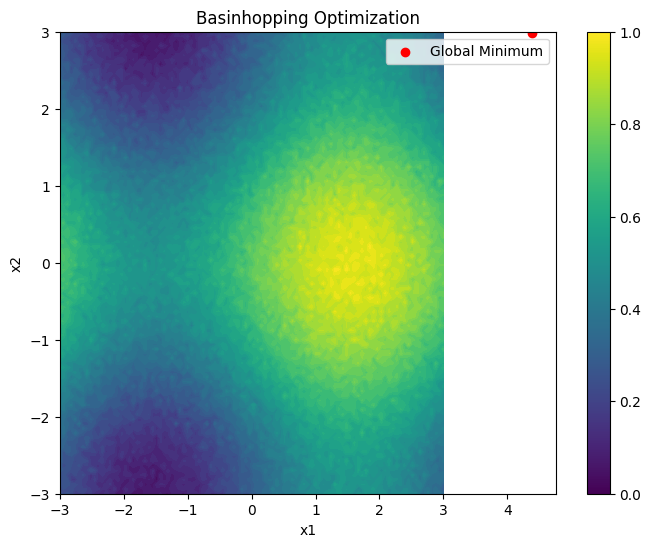

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import basinhopping

# 定义一个复杂的多峰函数
def objective(x):
    return np.sin(x[0]) + np.cos(x[1]) + np.random.normal(0, 0.1)

# 设定初始值
x0 = [2, 2]

# 执行 basinhopping 优化
result = basinhopping(objective, x0, niter=200, T=1.0, stepsize=0.5)

# 打印优化结果
print("Global minimum found at:", result.x)
print("Function value at global minimum:", result.fun)

# 可视化结果
x1 = np.linspace(-3, 3, 100)
x2 = np.linspace(-3, 3, 100)
X1, X2 = np.meshgrid(x1, x2)
Z = np.array([[objective([i, j]) for i, j in zip(x1, x2)] for x1, x2 in zip(X1, X2)])

plt.figure(figsize=(8, 6))
plt.contourf(X1, X2, Z, levels=50, cmap="viridis")
plt.scatter(result.x[0], result.x[1], color='red', label='Global Minimum')
plt.title('Basinhopping Optimization')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.colorbar()
plt.show()


### Differential Evolution（差分进化）
differential_evolution 是一种基于种群的全局优化算法，适用于高维、非线性的优化问题。它通过种群的变异、交叉和选择操作来逐步逼近最优解。

Global minimum found at: [-1.61643135  3.1208214 ]
Function value at global minimum: -2.363762910718717


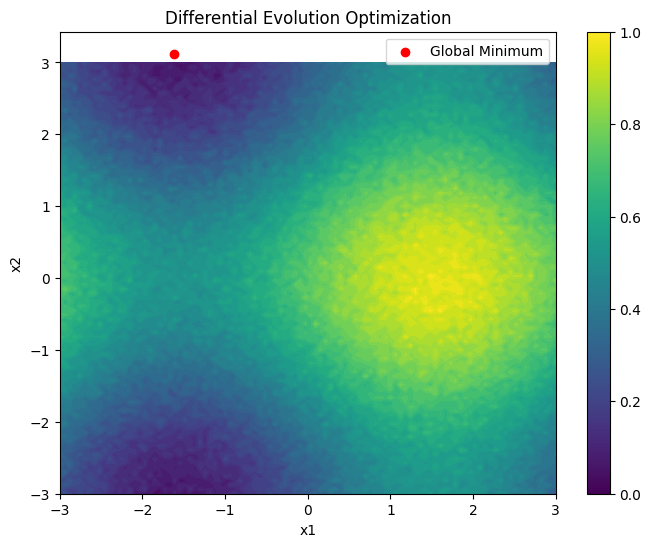

In [20]:
from scipy.optimize import differential_evolution

# 定义一个复杂的多峰函数
def objective(x):
    return np.sin(x[0]) + np.cos(x[1]) + np.random.normal(0, 0.1)

# 设置搜索空间的范围
bounds = [(-5, 5), (-5, 5)]

# 执行 differential evolution 优化
result = differential_evolution(objective, bounds, maxiter=200)

# 打印优化结果
print("Global minimum found at:", result.x)
print("Function value at global minimum:", result.fun)

# 可视化结果
x1 = np.linspace(-3, 3, 100)
x2 = np.linspace(-3, 3, 100)
X1, X2 = np.meshgrid(x1, x2)
Z = np.array([[objective([i, j]) for i, j in zip(x1, x2)] for x1, x2 in zip(X1, X2)])

plt.figure(figsize=(8, 6))
plt.contourf(X1, X2, Z, levels=50, cmap="viridis")
plt.scatter(result.x[0], result.x[1], color='red', label='Global Minimum')
plt.title('Differential Evolution Optimization')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.colorbar()
plt.show()


### 总结与原理：
1. **Basinhopping**：
   - **工作原理**：`basinhopping` 通过在多个局部最小值中跳跃，找到全局最小值。它在每次跳跃时随机选择一个新解，并使用局部优化算法在该解附近进行进一步优化。
   - **优点**：适用于非常复杂的多峰函数，不容易陷入局部最优。
   - **缺点**：计算开销较大，可能需要较长时间才能找到全局最优解。

2. **Differential Evolution**：
   - **工作原理**：`differential_evolution` 使用种群的进化过程来搜索最优解。它通过变异、交叉和选择操作产生新的解，避免陷入局部最优解。
   - **优点**：适用于大范围的优化问题，尤其是对于高维、非线性、多峰的函数。
   - **缺点**：计算开销较大，尤其是在维度很高的情况下。
